In [ ]:
# Import necessary libraries
import numpy as np # for linear algebra
import pandas as pd # for data analysis
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for data visualization
import plotly.express as px # for interactive data visualization
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

# Import preprocessing and modeling libraries
from sklearn.preprocessing import StandardScaler # for data normalization
from sklearn.model_selection import cross_val_score, KFold, train_test_split # for cross-validation and train-test split
from sklearn.linear_model import LogisticRegression # for logistic regression modeling
from sklearn.neighbors import KNeighborsClassifier # for K-nearest neighbors modeling
from sklearn.ensemble import RandomForestClassifier # for random forest modeling
from sklearn.tree import DecisionTreeClassifier # for DecisionTree  forest modeling
from sklearn.pipeline import make_pipeline # for creating a pipeline of preprocessing and modeling steps
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,r2_score # for model evaluation

# Import pickle to save trained models
import pickle

In [ ]:
# Load data
df = pd.read_csv("/content/Breast_cancer_data.csv")

In [ ]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
df.shape

(569, 6)

In [ ]:
#getting a quick overview information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
# some statistic
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [ ]:
corr_matrix = df.corr(method = "pearson" )
corr_matrix.style.background_gradient(cmap='coolwarm')

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


In [ ]:
fig = px.histogram(df, x="diagnosis", histfunc="count",
                   color_discrete_sequence=["#0072B2"])

# Customize the plot
fig.update_layout(title_text='Countplot of Diagnosis',
                  xaxis_title_text='Diagnosis',
                  yaxis_title_text='Count',
                  font=dict(size=14),
                  bargap=0.2,
                  bargroupgap=0.1,
                  showlegend=False)

fig.update_traces(marker_line_width=0)

# Show the plot
fig.show()

In [ ]:
def features_hist(df):
    fig, axs = plt.subplots(ncols=df.shape[1], figsize=(20,5))
    for i, col in enumerate(df.columns):
        sns.histplot(data=df, x=col, kde=True, color='#0072B2', alpha=0.8, ax=axs[i])
        axs[i].set_xlabel(col, fontsize=12)
        axs[i].set_ylabel('Density', fontsize=12)
        axs[i].set_title(f'Distribution of {col}', fontsize=14)
        sns.despine(ax=axs[i])
    plt.show()

In [ ]:
# determine which is X and which is Y
x = df.drop('diagnosis', axis=1)
y = df.diagnosis

In [ ]:
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=44,test_size=20 )

In [ ]:
# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

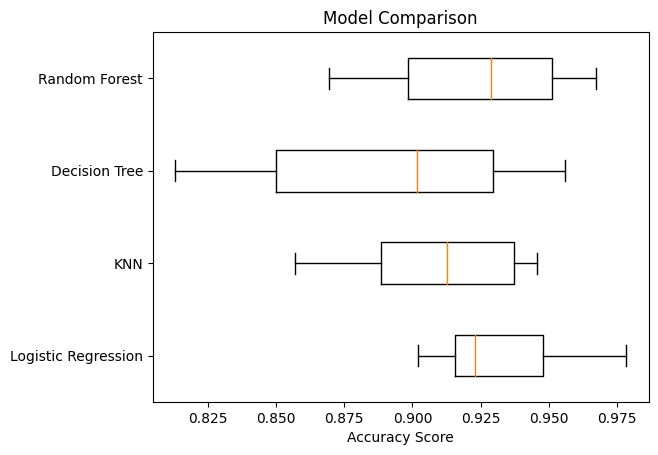

In [ ]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier()}

results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

plt.boxplot(results, labels=models.keys(), vert=False)
plt.xlabel('Accuracy Score')
plt.title('Model Comparison')
plt.show()

In [ ]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} train Set Accuracy: {}".format(name, train_score))
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression train Set Accuracy: 0.9326047358834244
Logistic Regression Test Set Accuracy: 0.9
KNN train Set Accuracy: 0.9289617486338798
KNN Test Set Accuracy: 1.0
Decision Tree train Set Accuracy: 1.0
Decision Tree Test Set Accuracy: 0.85
Random Forest train Set Accuracy: 1.0
Random Forest Test Set Accuracy: 0.85


In [ ]:
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Evaluate the model using cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean():.3f}')

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_test_pred = pipeline.predict(X_test)

# Compute performance metrics
confusion = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
accuracy = accuracy_score(y_test, y_test_pred)

# Print the evaluation results
print('Evaluation results:')
print('--------------------')
print(f'Confusion matrix:\n{confusion}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 score: {f1:.3f}')
print(f'Accuracy: {accuracy:.3f}')

Cross-validation scores: [0.94545455 0.83636364 0.95454545 0.90909091 0.9266055 ]
Average cross-validation score: 0.914
Evaluation results:
--------------------
Confusion matrix:
[[ 8  1]
 [ 1 10]]
Precision: 0.900
Recall: 0.900
F1 score: 0.900
Accuracy: 0.900
